In [ ]:
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------- -------------------------------- 61.4/323.6 kB 1.7 MB/s eta 0:00:01
   ----------------- ---------------------- 143.4/323.6 kB 1.4 MB/s eta 0:00:01
   -------------------------- ------------- 215.0/323.6 kB 1.5 MB/s eta 0:00:01
   ------------------------------------ --- 297.0/323.6 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.6 MB 1.5 MB/s eta 0:00:08
    --------------------------------------- 0.2/11.6 MB 1.8 MB/s eta 0:00:07
   - -------------------------------------- 0.3/11.6 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.4/11.6 MB 1.8 MB/s eta 0:00:07
   - -------------------------------------- 0.5/11.6 MB 1.9 MB/s eta 0:00:0

In [15]:
with rasterio.open("C:/Users/User/Desktop/egzamin/DTM/Lubin_2024_03_27.asc") as dem:
    dem_array = dem.read(1) 
    dem_transform = dem.transform  
    x_size, y_size = dem.width, dem.height

    x_coords = np.linspace(dem_transform.c, dem_transform.c + x_size * dem_transform.a, x_size)
    y_coords = np.linspace(dem_transform.f, dem_transform.f + y_size * dem_transform.e, y_size)

c:\Users\User\anaconda3\envs\jupyter\lib\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D Point' is converted to 'Point Z'
  return ogr_read(


mean error: 3.587 m
standard deviation: 8.525 m
RMSE: 9.249 m


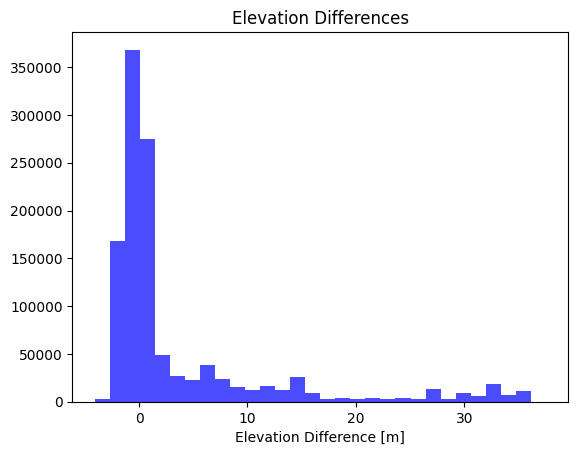

In [18]:
# Interpolation 
dem_interpolator = RegularGridInterpolator((y_coords[::-1], x_coords), dem_array)
#point cloud
pc = gpd.read_file("C:/Users/User/Desktop/egzamin/task2/Lubin_2024_03_27_pc_t1.shp")  
pc_x, pc_y, pc_z = pc.geometry.x, pc.geometry.y, pc["Z"]

#elev diff
dem_heights = dem_interpolator(np.array([pc_y, pc_x]).T)  
delta_h = pc_z - dem_heights  

# accuracy metrics
mean_error = np.mean(delta_h)
std_dev = np.std(delta_h)
rmse = np.sqrt(np.mean(delta_h**2))

print(f"mean error: {mean_error:.3f} m")
print(f"standard deviation: {std_dev:.3f} m")
print(f"RMSE: {rmse:.3f} m")


#plot
plt.hist(delta_h, bins=30, color="blue", alpha=0.7)
plt.xlabel("Elevation Difference [m]")
plt.title("Elevation Differences")
plt.show()